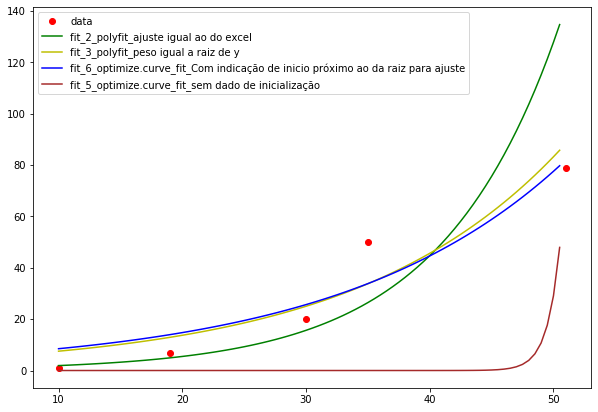

In [38]:
import pandas as pd
import numpy as np
import scipy
import scipy.optimize as optimize

y = np.array([1, 7, 20, 50, 79])
x = np.array([10, 19, 30, 35, 51])
x_fit=np.arange(start=10, stop=51, step=0.5)

aj2=np.polyfit(x, np.log(y), 1) #Este seria um forma de conseguir o ajuste exponencial 
                                # usando o logatimo,assim como fazemos no excel
yaj2=np.exp(aj2[1])*np.exp(aj2[0]*x_fit)


aj3=np.polyfit(x, np.log(y), 1,w=np.sqrt(y)) #Este com ajuste do peso por raiz de y, menos enviesado
yaj3=np.exp(aj3[1])*np.exp(aj3[0]*x_fit)

aj4=scipy.optimize.curve_fit(lambda t,a,b: a+b*np.log(t),  y,  x) #memso resultado que o primeiro método

aj5=scipy.optimize.curve_fit(lambda t,a,b: a*np.exp(b*t),  x,  y) #erro se desconsiderar dado de inicialização

aj6=scipy.optimize.curve_fit(lambda t,a,b: a*np.exp(b*t),  x,  y,  p0=(4, 0.1)) #ajuste dica de inicialização

from matplotlib import pyplot as plt


def ff(t, a, b):
    return a*np.exp(b*t)

pfit, perr = scipy.optimize.curve_fit(ff,x,y,p0=(4, 0.1))

plt.figure(figsize=(10,7))

plt.plot(x, y, "ro", label = "data")

#ajuste igual ao excel
plt.plot(x_fit, yaj2, "green", label = "fit_2_polyfit_ajuste igual ao do excel")

#ajuste igual ao excel com peso igual a raiz
plt.plot(x_fit, yaj3, "y", label = "fit_3_polyfit_peso igual a raiz de y ")

#ajuste com peso
y_fit = ff(x_fit, *pfit)
plt.plot(x_fit, y_fit, "b", label = "fit_6_optimize.curve_fit_Com indicação de inicio próximo ao da raiz para ajuste")

#Muito errado
y_fit2 = ff(x_fit, *aj5[0])
plt.plot(x_fit, y_fit2, "brown", label = "fit_5_optimize.curve_fit_sem dado de inicialização")
plt.legend()
plt.show()

